<a href="https://colab.research.google.com/github/aagamj/Stocks/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install nsetools
!pip install mplfinance

     |████████████████████████████████| 6.3 MB 7.9 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=26128c1490452867f2c6f87e4f0545aaa8c63da857ccb03696d2c3ffde7424f5
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 62 kB 916 kB/s 


In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import math
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


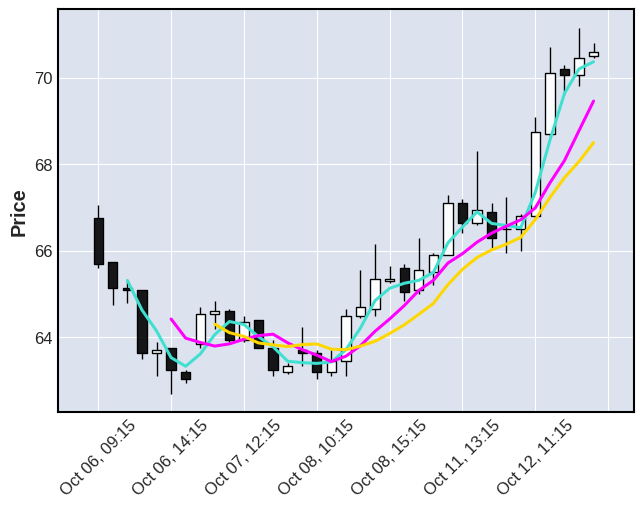

In [3]:
data = yf.download(tickers='bhel.NS', period='5d', interval='1h')
mpf.plot(data,type='candle',mav = (3,6,9))

In [37]:
# get stock prices using yfinance library
def get_stock_price(symbol):
  df = yf.download(symbol, start='2021-10-12',interval = '1d', volume = True,mav = (3,6,9), threads= False)
  df['Date'] = pd.to_datetime(df.index)
  df['Date'] = df['Date'].apply(mpl_dates.date2num)
  df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
  return df
  
  symbol = 'BHEL.NS'


[*********************100%***********************]  1 of 1 completed


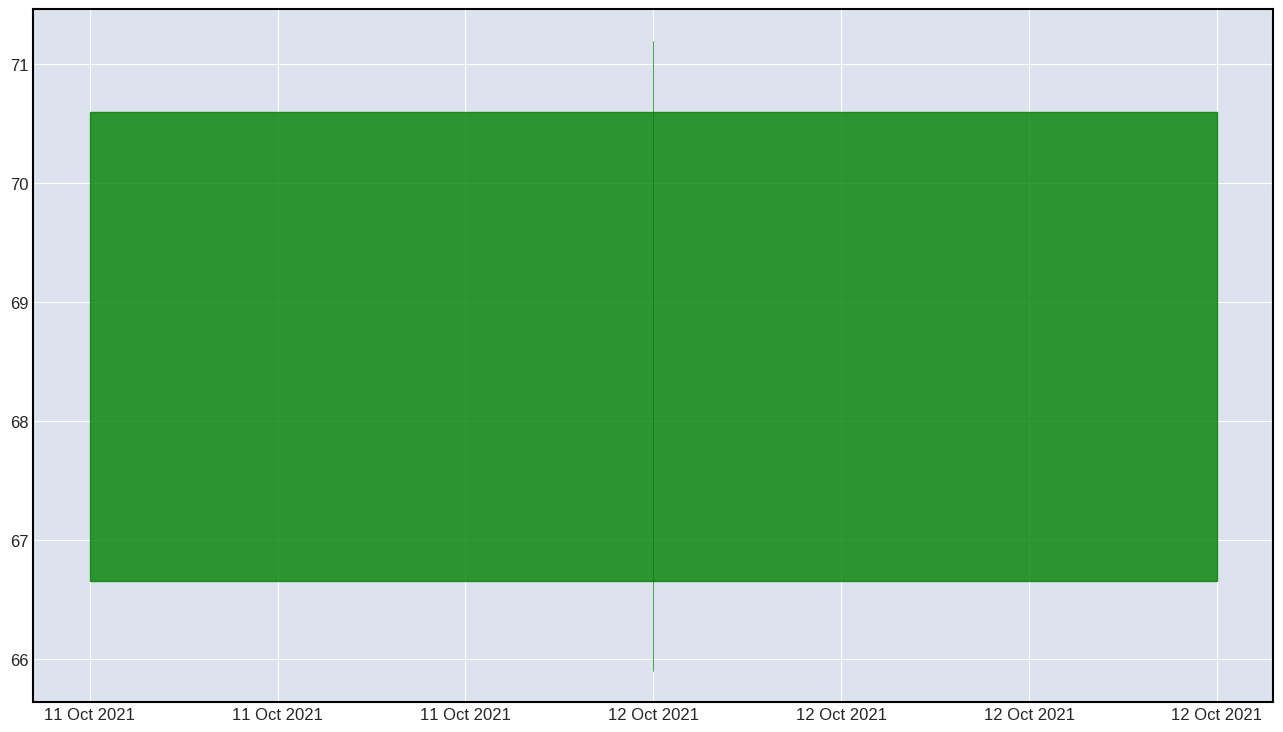

In [38]:
#method 2: window shifting method
#using the same symbol as the first example above
symbol = 'BHEL.NS'
df = get_stock_price('BHEl.NS')

pivots = []
max_list = []
min_list = []
for i in range(5, len(df)-5):
  # taking a window of 9 candles
  high_range = df['High'][i-5:i+4]
  current_max = high_range.max()
  # if we find a new maximum value, empty the max_list 
  if current_max not in max_list:
    max_list = []
  max_list.append(current_max)
  # if the maximum value remains the same after shifting 5 times
  if len(max_list)==5 and is_far_from_level(current_max,pivots,df):
      pivots.append((high_range.idxmax(), current_max))
    
  low_range = df['Low'][i-5:i+5]
  current_min = low_range.min()
  if current_min not in min_list:
    min_list = []
  min_list.append(current_min)
  if len(min_list)==5 and is_far_from_level(current_min,pivots,df):
    pivots.append((low_range.idxmin(), current_min))
    
plot_all(pivots, df)